In [5]:
# To work with dataframes
import pandas as pd 

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sns

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

data_income = pd.read_csv('income(1).csv')                                      
  
# Creating a copy of original data                                                                           
data = data_income.copy()
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [6]:
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print('Data columns with null values:\n', data.isnull().sum())


Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [8]:
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [10]:
summary_cate = data.describe(include = "O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [11]:
data['JobType'].value_counts()


JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [12]:
data['occupation'].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [13]:
#**** Checking for unique classes
print(np.unique(data['JobType'])) 
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [14]:
# Data pre-processing
data.isnull().sum()

missing = data[data.isnull().any(axis=1)]
# axis=1 => to consider at least one column value is missing in a row

missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat


In [15]:
#**** There exists ' ?' instesd of nan

"""
Go back and read the data by including "na_values[' ?']" to consider ' ?' as nan !!!
"""
data = pd.read_csv('income(1).csv',na_values=[" ?"]) 
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [17]:
data2 = data.dropna(axis=0)
data2


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [18]:
# Filter out non-numeric columns
numeric_data = data2.select_dtypes(include=[float, int])
numeric_data



,age,capitalgain,capitalloss,hoursperweek
0,45,0,0,28
1,24,0,0,40
2,44,0,0,40
3,27,0,0,40
4,20,0,0,35
...,...,...,...,...
31973,34,594,0,60
31974,34,0,0,40
31975,23,0,0,40
31976,42,0,0,40


In [19]:
# Realtionship between independent variables
correlation = numeric_data.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [20]:
# Cross tables & Data Visualization
# Extracting the column names
data2.columns
 


Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [21]:
# Gender proportion table:

gender = pd.crosstab(index = data2["gender"], columns  = 'count', normalize = True)
print(gender) 

col_0      count
gender          
Female  0.324315
Male    0.675685


In [22]:
#  Gender vs Salary Status:

gender_salstat = pd.crosstab(index = data2["gender"],columns = data2['SalStat'], margins = True, normalize =  'index') 
                 # Include row and column totals
print(gender_salstat)

SalStat  greater than 50,000  less than or equal to 50,000
gender                                                    
 Female             0.113678                      0.886322
 Male               0.313837                      0.686163
All                 0.248922                      0.751078


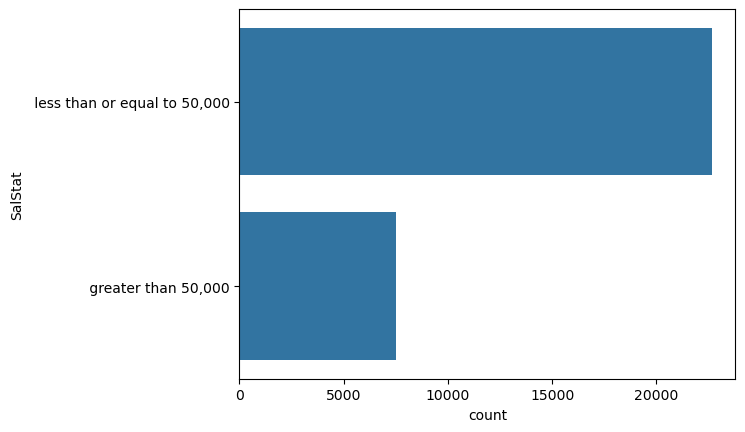

In [23]:
# Frequency distribution of 'Salary status' 
  
SalStat = sns.countplot(data2['SalStat'])

<Axes: xlabel='age', ylabel='Count'>

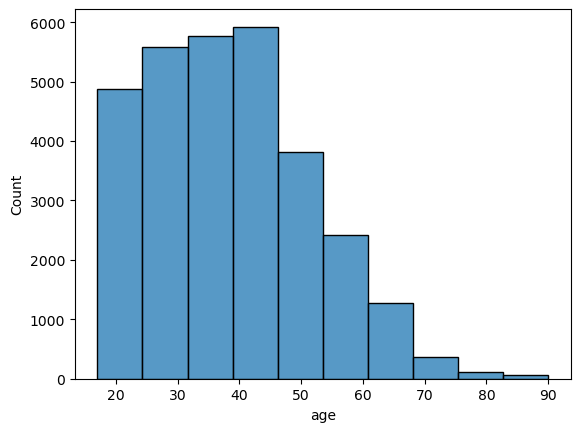

In [29]:
##############  Histogram of Age  #############################
sns.histplot(data2['age'], bins=10, kde=False)
# People with age 20-45 age are high in frequency

SalStat
greater than 50,000             43.0
less than or equal to 50,000    34.0
Name: age, dtype: float64

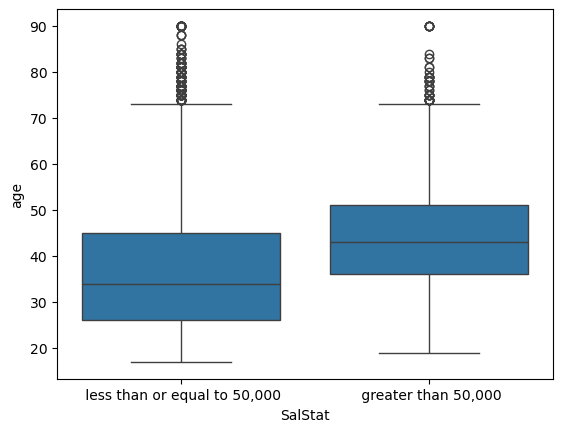

In [25]:
############# Box Plot - Age vs Salary status #################
sns.boxplot(x='SalStat', y='age',data=data2)
data2.groupby('SalStat')['age'].median()

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


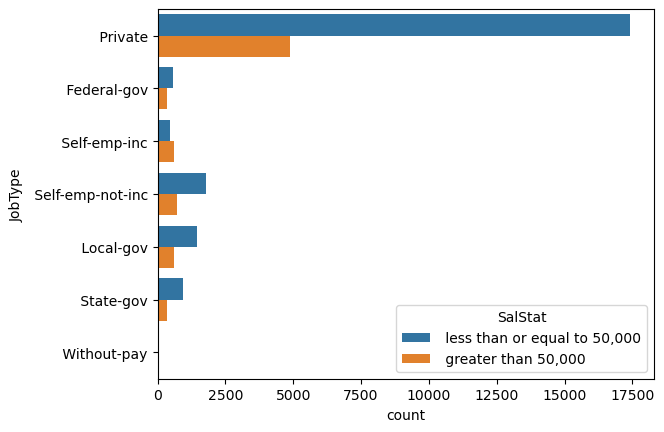

In [26]:
#*** Jobtype
JobType     = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


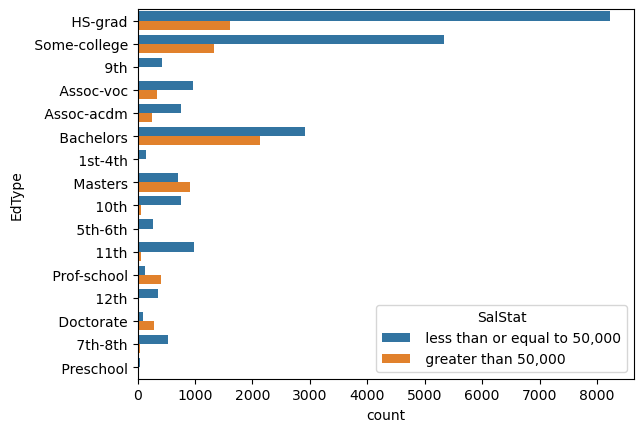

In [27]:
#*** Education
Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)


<Axes: xlabel='capitalgain', ylabel='Count'>

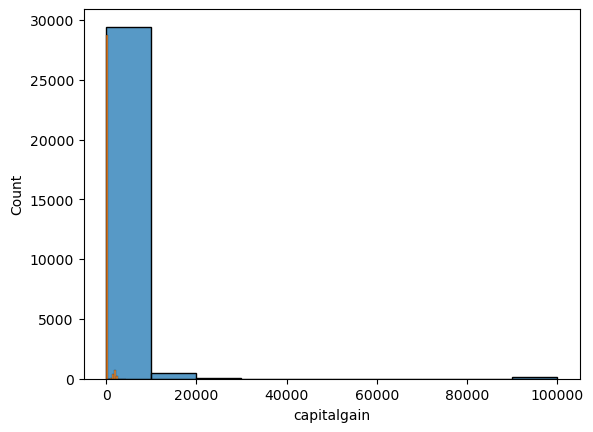

In [28]:
#*** Capital gain
sns.histplot(data2['capitalgain'], bins = 10, kde = False)

sns.histplot(data2['capitalloss'], bins = 10, kde = False)

In [31]:
# LOGISTIC REGRESSION
# =============================================================================

# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31973   NaN
31974   NaN
31975   NaN
31976   NaN
31977   NaN
Name: SalStat, Length: 30162, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_6812\2169408705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [32]:
new_data=pd.get_dummies(data2, drop_first=True)

In [33]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [35]:

# Storing the column names 
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s